In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('Label_Tickets_5.csv')


In [3]:
df.head()

,Index,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,...,timely,complaint_what_happened,sub_issue,consumer_consent_provided,tokenized_complaint,tokenized_stopword_removed,complaint_1,lemmatized_complaint,POS_NN_PRN_JJ,Dominant_Topic
0,1,319xx,3229299,written notification about debt,2019-05-01t12:00:00-05:00,ga,NaN,debt collection,closed with explanation,jpmorgan chase & co.,...,yes,good morning my name is and i appreciate it i...,didn't receive enough information to verify debt,consent provided,"['good', 'morning', 'my', 'name', 'is', 'and',...","['good', 'morning', 'name', 'appreciate', 'cou...",good morning name appreciate could help put st...,good morning name appreciate could help put st...,good morning name stop chase bank cardmember s...,2
1,2,77069,3199379,"other features, terms, or problems",2019-04-02t12:00:00-05:00,tx,NaN,credit card or prepaid card,closed with explanation,jpmorgan chase & co.,...,yes,i upgraded my card in and was told by the ag...,problem with rewards from credit card,consent provided,"['i', 'upgraded', 'my', 'card', 'in', 'and', '...","['upgraded', 'card', 'told', 'agent', 'upgrade...",upgraded card told agent upgrade anniversary d...,upgrade card tell agent upgrade anniversary da...,upgrade card agent upgrade anniversary date ag...,2
2,10,104xx,3233499,incorrect information on your report,2019-05-06t12:00:00-05:00,ny,NaN,"credit reporting, credit repair services, or o...",closed with explanation,jpmorgan chase & co.,...,yes,chase card was reported on 2019 however fraudu...,information belongs to someone else,consent provided,"['chase', 'card', 'was', 'reported', 'on', '20...","['chase', 'card', 'reported', '2019', 'however...",chase card reported 2019 however fraudulent ap...,chase card report 2019 however fraudulent appl...,chase card report fraudulent application ident...,3
3,11,750xx,3180294,incorrect information on your report,2019-03-14t12:00:00-05:00,tx,NaN,"credit reporting, credit repair services, or o...",closed with explanation,jpmorgan chase & co.,...,yes,on while trying to book a ticket i came a...,information belongs to someone else,consent provided,"['on', 'while', 'trying', 'to', 'book', 'a', '...","['trying', 'book', 'ticket', 'came', 'across',...",trying book ticket came across offer 30000 app...,try book ticket come across offer 30000 apply ...,book ticket offer ticket reward card informati...,2
4,14,920xx,3224980,managing an account,2019-04-27t12:00:00-05:00,ca,NaN,checking or savings account,closed with explanation,jpmorgan chase & co.,...,yes,my grand son give me check for 160000 i deposi...,funds not handled or disbursed as instructed,consent provided,"['my', 'grand', 'son', 'give', 'me', 'check', ...","['grand', 'son', 'give', 'check', '160000', 'd...",grand son give check 160000 deposit chase acco...,grand son give check 160000 deposit chase acco...,grand son check deposit chase account fund cle...,1


In [4]:
df.columns

Index(['Index', 'zip_code', 'complaint_id', 'issue', 'date_received', 'state',
       'consumer_disputed', 'product', 'company_response', 'company',
       'submitted_via', 'date_sent_to_company', 'company_public_response',
       'sub_product', 'timely', 'complaint_what_happened', 'sub_issue',
       'consumer_consent_provided', 'tokenized_complaint',
       'tokenized_stopword_removed', 'complaint_1', 'lemmatized_complaint',
       'POS_NN_PRN_JJ', 'Dominant_Topic'],
      dtype='object')

In [5]:
cols=['Index', 'zip_code', 'complaint_id', 'issue', 'date_received', 'state',
       'consumer_disputed', 'product', 'company_response', 'company',
       'submitted_via', 'date_sent_to_company', 'company_public_response',
       'sub_product', 'timely', 'complaint_what_happened', 'sub_issue',
       'consumer_consent_provided', 'tokenized_complaint',
       'tokenized_stopword_removed', 'complaint_1']
df.drop(cols,axis=1,inplace=True)

In [6]:
df.reset_index()
df

,lemmatized_complaint,POS_NN_PRN_JJ,Dominant_Topic
0,good morning name appreciate could help put st...,good morning name stop chase bank cardmember s...,2
1,upgrade card tell agent upgrade anniversary da...,upgrade card agent upgrade anniversary date ag...,2
2,chase card report 2019 however fraudulent appl...,chase card report fraudulent application ident...,3
3,try book ticket come across offer 30000 apply ...,book ticket offer ticket reward card informati...,2
4,grand son give check 160000 deposit chase acco...,grand son check deposit chase account fund cle...,1
...,...,...,...
21067,chase card customer well decade offer multiple...,chase card customer decade multiple solicitati...,2
21068,wednesday call chas visa credit card provider ...,wednesday call chas visa credit card provider ...,3
21069,familiar pay understand great risk provide con...,familiar pay great risk consumer safe chase ba...,1
21070,flawless credit 30 yrs chase credit card chase...,flawless credit yrs chase credit card chase fr...,2


In [7]:
def model_evaluation(y_test, y_pred, model_name):
    from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # Classification Report
    print("Classification report for", model_name, "\n")
    print(classification_report(y_test, y_pred))

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.title("Confusion Matrix")
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    return 


In [8]:
df['POS_NN_PRN_JJ'].fillna('',inplace=True)

In [9]:

X = df['POS_NN_PRN_JJ']
y = df['Dominant_Topic']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape

(16857,)

In [12]:
X_test.shape

(4215,)

In [13]:
y_train.shape

(16857,)

In [14]:
y_test.shape

(4215,)

In [15]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

KNN CLASSIFIER

In [16]:
model_name="KNN CLASSIFIER"

In [32]:
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [33]:
y_pred_knn = knn_classifier.predict(X_test)

In [34]:
y_pred_knn

array([1, 1, 0, ..., 2, 2, 0], dtype=int64)

In [35]:
f1_score_knn=f1_score(y_test, y_pred_knn, average="weighted")
print(f1_score_knn)

0.8118831267588391


Classification report for KNN CLASSIFIER 

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       861
           1       0.86      0.84      0.85      1418
           2       0.81      0.76      0.79      1150
           3       0.72      0.78      0.75       777
           4       0.00      0.00      0.00         9

    accuracy                           0.81      4215
   macro avg       0.64      0.65      0.65      4215
weighted avg       0.81      0.81      0.81      4215

Accuracy: 0.8123368920521945


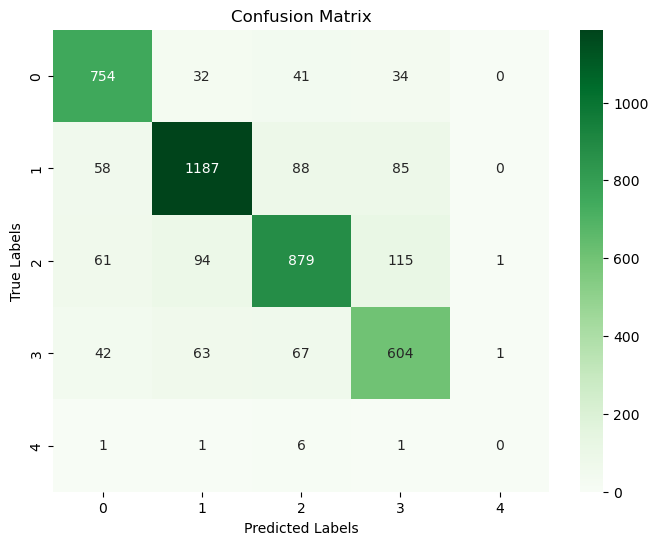

In [36]:
model_evaluation(y_test,y_pred_knn,model_name)

In [37]:
f1_score_model=pd.DataFrame([{'Model': 'KNN Classifier','F1 Score': round(f1_score_knn, 2)}])
f1_score_model

,Model,F1 Score
0,KNN Classifier,0.81


NAIVE BAYES

In [38]:
model_name="NAIVE BAYES"

In [39]:
nb=MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [40]:
y_pred_nb=nb.predict(X_test)

In [41]:
y_pred_nb

array([1, 1, 0, ..., 2, 2, 0], dtype=int64)

In [42]:
f1_score_nb=f1_score(y_test, y_pred_nb, average="weighted")
print(f1_score_nb)

0.7935155861523693


Classification report for NAIVE BAYES 

              precision    recall  f1-score   support

           0       0.98      0.82      0.89       861
           1       0.70      0.99      0.82      1418
           2       0.82      0.84      0.83      1150
           3       0.98      0.42      0.58       777
           4       0.00      0.00      0.00         9

    accuracy                           0.81      4215
   macro avg       0.70      0.61      0.63      4215
weighted avg       0.84      0.81      0.79      4215

Accuracy: 0.8059311981020166


c:\Users\ramit\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ramit\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ramit\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


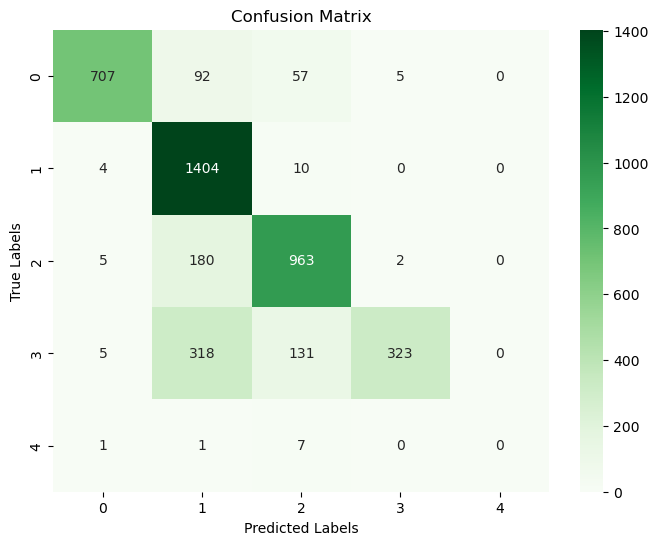

In [43]:
model_evaluation(y_test,y_pred_nb,model_name)

In [44]:
f1_score_model.loc[len(f1_score_model.index)]=['Naive Bayes',round(f1_score_nb,2)]
f1_score_model

,Model,F1 Score
0,KNN Classifier,0.81
1,Naive Bayes,0.79


LOGISTIC REGRESSION

In [45]:
model_name="LOGISTIC REGRESSION"

In [46]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

c:\Users\ramit\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
y_pred_lr=lr.predict(X_test)

In [48]:
y_pred_lr

array([1, 1, 0, ..., 2, 3, 0], dtype=int64)

In [49]:
f1_score_lr=f1_score(y_test, y_pred_lr, average="weighted")
print(f1_score_lr)

0.8866256556729507


Classification report for LOGISTIC REGRESSION 

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       861
           1       0.90      0.91      0.91      1418
           2       0.86      0.87      0.87      1150
           3       0.87      0.87      0.87       777
           4       0.00      0.00      0.00         9

    accuracy                           0.89      4215
   macro avg       0.71      0.71      0.71      4215
weighted avg       0.89      0.89      0.89      4215

Accuracy: 0.8875444839857651


c:\Users\ramit\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ramit\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ramit\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


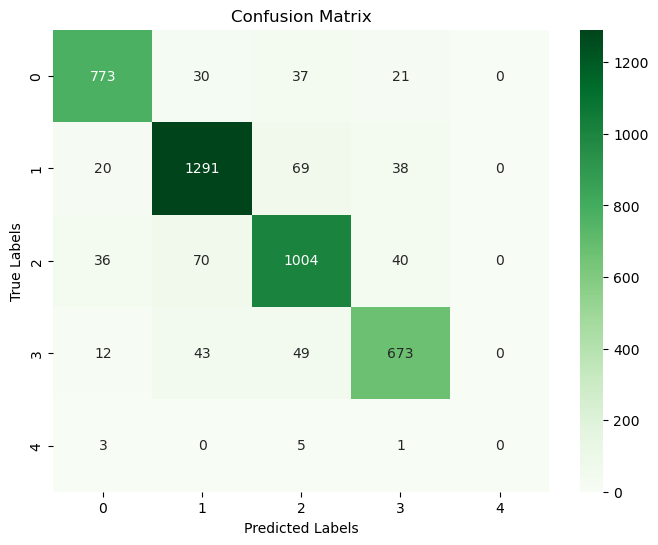

In [50]:
model_evaluation(y_test,y_pred_lr,model_name)

In [51]:
f1_score_model.loc[len(f1_score_model.index)]=['Logistic Regression',round(f1_score_lr,2)]
f1_score_model

,Model,F1 Score
0,KNN Classifier,0.81
1,Naive Bayes,0.79
2,Logistic Regression,0.89


RANDOM FOREST

In [52]:
model_name="RANDOM FOREST"

In [53]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
y_pred_rf=rf.predict(X_test)

In [55]:
f1_score_rf=f1_score(y_test, y_pred_rf, average="weighted")
print(f1_score_rf)

0.8331801389647916


Classification report for RANDOM FOREST 

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       861
           1       0.81      0.91      0.86      1418
           2       0.82      0.81      0.82      1150
           3       0.84      0.73      0.78       777
           4       1.00      0.11      0.20         9

    accuracy                           0.83      4215
   macro avg       0.87      0.68      0.70      4215
weighted avg       0.84      0.83      0.83      4215

Accuracy: 0.834638196915777


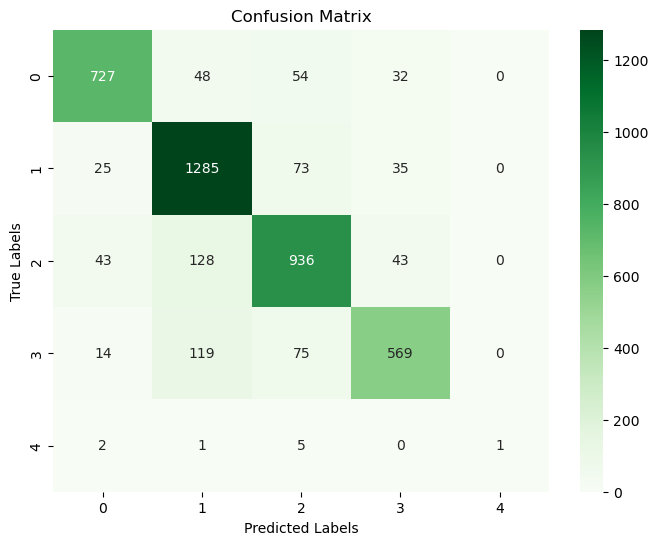

In [56]:
model_evaluation(y_test,y_pred_rf,model_name)

In [57]:
f1_score_model.loc[len(f1_score_model.index)]=['Random Forest',round(f1_score_rf,2)]
f1_score_model

,Model,F1 Score
0,KNN Classifier,0.81
1,Naive Bayes,0.79
2,Logistic Regression,0.89
3,Random Forest,0.83


DECISION TREE

In [58]:
model_name="DECISION TREE"

In [59]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
y_pred_dt=dt.predict(X_test)

In [61]:
y_pred_dt

array([2, 1, 0, ..., 2, 2, 0], dtype=int64)

In [62]:
f1_score_dt=f1_score(y_test, y_pred_dt, average="weighted")
print(f1_score_dt)

0.6970130075119647


Classification report for DECISION TREE 

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       861
           1       0.74      0.73      0.73      1418
           2       0.65      0.67      0.66      1150
           3       0.62      0.64      0.63       777
           4       1.00      0.11      0.20         9

    accuracy                           0.70      4215
   macro avg       0.75      0.58      0.60      4215
weighted avg       0.70      0.70      0.70      4215

Accuracy: 0.6970344009489917


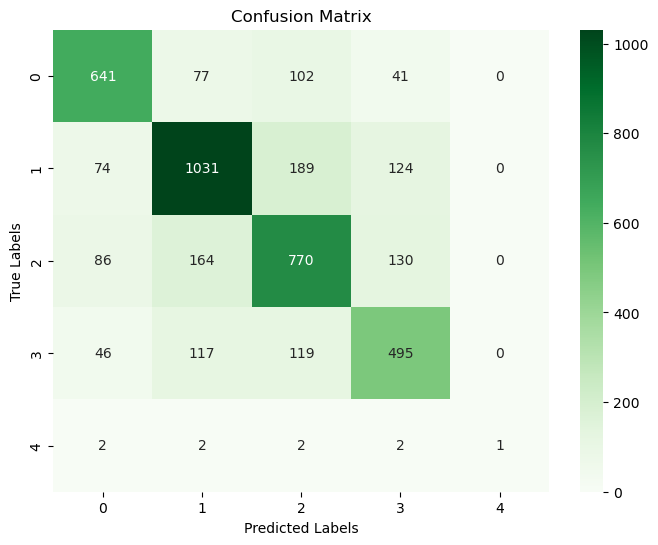

In [63]:
model_evaluation(y_test,y_pred_dt,model_name)

In [64]:
f1_score_model.loc[len(f1_score_model.index)]=['Decision Tree',round(f1_score_dt,2)]

In [65]:
f1_score_model

,Model,F1 Score
0,KNN Classifier,0.81
1,Naive Bayes,0.79
2,Logistic Regression,0.89
3,Random Forest,0.83
4,Decision Tree,0.70


In [66]:
accuracy_knn=round(accuracy_score(y_test,y_pred_knn),2)
accuracy_nb=round(accuracy_score(y_test,y_pred_nb),2)
accuracy_lr=round(accuracy_score(y_test,y_pred_lr),2)
accuracy_rf=round(accuracy_score(y_test,y_pred_rf),2)
accuracy_dt=round(accuracy_score(y_test,y_pred_dt),2)



In [67]:
import pandas as pd

accuracy_dict = {
    'Model': ['KNN', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Accuracy': [accuracy_knn, accuracy_nb, accuracy_lr, accuracy_rf, accuracy_dt]
}

accuracy_score_model = pd.DataFrame(accuracy_dict)


In [68]:
#accuracy
accuracy_score_model

,Model,Accuracy
0,KNN,0.81
1,Naive Bayes,0.81
2,Logistic Regression,0.89
3,Random Forest,0.83
4,Decision Tree,0.70


In [69]:
#f1-score
f1_score_model

,Model,F1 Score
0,KNN Classifier,0.81
1,Naive Bayes,0.79
2,Logistic Regression,0.89
3,Random Forest,0.83
4,Decision Tree,0.70


In [70]:
from sklearn.metrics import precision_score

precision_knn = round(precision_score(y_test, y_pred_knn, average='weighted'), 2)
precision_nb = round(precision_score(y_test, y_pred_nb, average='weighted'), 2)
precision_lr = round(precision_score(y_test, y_pred_lr, average='weighted'), 2)
precision_rf = round(precision_score(y_test, y_pred_rf, average='weighted'), 2)
precision_dt = round(precision_score(y_test, y_pred_dt, average='weighted'), 2)


c:\Users\ramit\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ramit\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
# precision-score
precision_dict = {
    'Model': ['KNN', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Precision': [precision_knn, precision_nb, precision_lr, precision_rf, precision_dt]
}

precision_score_model = pd.DataFrame(precision_dict)

In [74]:
precision_score_model

,Model,Precision
0,KNN,0.81
1,Naive Bayes,0.84
2,Logistic Regression,0.89
3,Random Forest,0.84
4,Decision Tree,0.70


In [75]:

from sklearn.metrics import jaccard_score

jaccard_knn = round(jaccard_score(y_test, y_pred_knn, average='weighted'), 2)
jaccard_nb = round(jaccard_score(y_test, y_pred_nb, average='weighted'), 2)
jaccard_lr = round(jaccard_score(y_test, y_pred_lr, average='weighted'), 2)
jaccard_rf = round(jaccard_score(y_test, y_pred_rf, average='weighted'), 2)
jaccard_dt = round(jaccard_score(y_test, y_pred_dt, average='weighted'), 2)

In [76]:
jaccard_dict = {
    'Model': ['KNN', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Jaccard Index': [jaccard_knn, jaccard_nb, jaccard_lr, jaccard_rf, jaccard_dt]
}

jaccard_score_model = pd.DataFrame(jaccard_dict)

In [78]:
#jaccard_score
jaccard_score_model

,Model,Jaccard Index
0,KNN,0.69
1,Naive Bayes,0.67
2,Logistic Regression,0.80
3,Random Forest,0.72
4,Decision Tree,0.54


In [79]:
# True positive rate: RECALL AND SENSITIVITY
from sklearn.metrics import recall_score

recall_knn = round(recall_score(y_test, y_pred_knn, average='weighted'), 2)
recall_nb = round(recall_score(y_test, y_pred_nb, average='weighted'), 2)
recall_lr = round(recall_score(y_test, y_pred_lr, average='weighted'), 2)
recall_rf = round(recall_score(y_test, y_pred_rf, average='weighted'), 2)
recall_dt = round(recall_score(y_test, y_pred_dt, average='weighted'), 2)

In [80]:
tp_rate_dict = {
    'Model': ['KNN', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'Decision Tree'],
    'True Positive Rate (Sensitivity)': [recall_knn, recall_nb, recall_lr, recall_rf, recall_dt]
}

tp_rate_model = pd.DataFrame(tp_rate_dict)

In [81]:
tp_rate_model

,Model,True Positive Rate (Sensitivity)
0,KNN,0.81
1,Naive Bayes,0.81
2,Logistic Regression,0.89
3,Random Forest,0.83
4,Decision Tree,0.70


In [83]:
#FALSE POSITIVE RATE: SPECIFICITY
specificity_knn = round(confusion_matrix(y_test, y_pred_knn)[0, 0] / (confusion_matrix(y_test, y_pred_knn)[0, 0] + confusion_matrix(y_test, y_pred_knn)[0, 1]), 2)
specificity_nb = round(confusion_matrix(y_test, y_pred_nb)[0, 0] / (confusion_matrix(y_test, y_pred_nb)[0, 0] + confusion_matrix(y_test, y_pred_nb)[0, 1]), 2)
specificity_lr = round(confusion_matrix(y_test, y_pred_lr)[0, 0] / (confusion_matrix(y_test, y_pred_lr)[0, 0] + confusion_matrix(y_test, y_pred_lr)[0, 1]), 2)
specificity_rf = round(confusion_matrix(y_test, y_pred_rf)[0, 0] / (confusion_matrix(y_test, y_pred_rf)[0, 0] + confusion_matrix(y_test, y_pred_rf)[0, 1]), 2)
specificity_dt = round(confusion_matrix(y_test, y_pred_dt)[0, 0] / (confusion_matrix(y_test, y_pred_dt)[0, 0] + confusion_matrix(y_test, y_pred_dt)[0, 1]), 2)

In [84]:
specificity_dict = {
    'Model': ['KNN', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'Decision Tree'],
    'True Negative Rate (Specificity)': [specificity_knn, specificity_nb, specificity_lr, specificity_rf, specificity_dt]
}

specificity_model = pd.DataFrame(specificity_dict)

In [85]:
specificity_model

,Model,True Negative Rate (Specificity)
0,KNN,0.96
1,Naive Bayes,0.88
2,Logistic Regression,0.96
3,Random Forest,0.94
4,Decision Tree,0.89


In [86]:
#Confusion matrix

In [114]:
#Gini Index
#KNN
conf_matrix_knn= confusion_matrix(y_test, y_pred_knn)
conf_matrix_knn

array([[ 754,   32,   41,   34,    0],
       [  58, 1187,   88,   85,    0],
       [  61,   94,  879,  115,    1],
       [  42,   63,   67,  604,    1],
       [   1,    1,    6,    1,    0]], dtype=int64)

In [115]:
num_classes_knn = conf_matrix_knn.shape[0]
num_classes_knn

5

In [116]:
gini_indices_knn= []

In [117]:
for class_label_knn in range(num_classes_knn):
    true_positives_knn = conf_matrix_knn[class_label_knn, class_label_knn]
    total_positives_knn= np.sum(conf_matrix_knn[class_label_knn, :])
    gini_index_class_knn = 1 - (true_positives_knn / total_positives_knn) ** 2
    gini_indices_knn.append(gini_index_class_knn)


In [118]:
average_gini_index_knn= np.mean(gini_indices_knn)

print("Gini Indices for each class:", gini_indices_knn)
print("Average Gini Index:", average_gini_index_knn)

Gini Indices for each class: [0.23310414786576927, 0.29927279925041916, 0.41577240075614375, 0.3957288783543609, 1.0]
Average Gini Index: 0.4687756452453386


In [119]:
#Naive Bayes
conf_matrix_nb= confusion_matrix(y_test, y_pred_nb)
conf_matrix_nb

array([[ 707,   92,   57,    5,    0],
       [   4, 1404,   10,    0,    0],
       [   5,  180,  963,    2,    0],
       [   5,  318,  131,  323,    0],
       [   1,    1,    7,    0,    0]], dtype=int64)

In [120]:
num_classes_nb = conf_matrix_nb.shape[0]
num_classes_nb

5

In [121]:
gini_indices_nb= []

In [143]:
for class_label_nb in range(num_classes_nb):
    true_positives_nb = conf_matrix_nb[class_label_nb, class_label_nb]
    total_positives_nb= np.sum(conf_matrix_nb[class_label_nb, :])
    gini_index_class_nb = 1 - (true_positives_nb / total_positives_nb) ** 2
    gini_indices_nb.append(gini_index_class_nb)


In [145]:
average_gini_index_nb= np.mean(gini_indices_nb)

print("Gini Indices for each class:", gini_indices_nb)
print("Average Gini Index:", average_gini_index_nb)

Gini Indices for each class: [0.23310414786576927, 0.29927279925041916, 0.41577240075614375, 0.3957288783543609, 1.0, 0.32573203780818294, 0.01964864397102728, 0.29877580340264653, 0.8271923329838388, 1.0]
Average Gini Index: 0.48152270443923884


In [124]:
#Logistic regression
conf_matrix_lr= confusion_matrix(y_test, y_pred_lr)
conf_matrix_lr

array([[ 773,   30,   37,   21,    0],
       [  20, 1291,   69,   38,    0],
       [  36,   70, 1004,   40,    0],
       [  12,   43,   49,  673,    0],
       [   3,    0,    5,    1,    0]], dtype=int64)

In [125]:
num_classes_lr = conf_matrix_lr.shape[0]
num_classes_lr

5

In [126]:
gini_indices_lr= []

In [127]:
for class_label_lr in range(num_classes_lr):
    true_positives_lr = conf_matrix_lr[class_label_lr, class_label_lr]
    total_positives_lr = np.sum(conf_matrix_lr[class_label_lr, :])
    gini_index_class_lr = 1 - (true_positives_lr / total_positives_lr) ** 2
    gini_indices_lr.append(gini_index_class_lr)

In [128]:
average_gini_index_lr= np.mean(gini_indices_lr)

print("Gini Indices for each class:", gini_indices_lr)
print("Average Gini Index:", average_gini_index_lr)

Gini Indices for each class: [0.19396725575020812, 0.17110404013678648, 0.23779508506616254, 0.2497809447616398, 1.0]
Average Gini Index: 0.3705294651429594


In [129]:
#Random forest

In [130]:
conf_matrix_rf= confusion_matrix(y_test, y_pred_rf)
conf_matrix_rf

array([[ 727,   48,   54,   32,    0],
       [  25, 1285,   73,   35,    0],
       [  43,  128,  936,   43,    0],
       [  14,  119,   75,  569,    0],
       [   2,    1,    5,    0,    1]], dtype=int64)

In [131]:
num_classes_rf = conf_matrix_rf.shape[0]
num_classes_rf

5

In [132]:
gini_indices_rf=[]

In [146]:
for class_label_rf in range(num_classes_rf):
    true_positives_rf = conf_matrix_rf[class_label_rf, class_label_rf]
    total_positives_rf = np.sum(conf_matrix_rf[class_label_rf, :])
    gini_index_class_rf = 1 - (true_positives_rf / total_positives_rf) ** 2
    gini_indices_rf.append(gini_index_class_rf)

In [147]:
average_gini_index_rf= np.mean(gini_indices_rf)

print("Gini Indices for each class:", gini_indices_rf)
print("Average Gini Index:", average_gini_index_rf)

Gini Indices for each class: [0.999994604226779, 0.9999995026667011, 0.9999810964083176, 1.0, 0.9876543209876543, 0.44574482579071684, 0.47135409931944916, 0.5516824196597353, 0.594147374070154, 0.9876543209876543, 0.44574482579071684, 0.47135409931944916, 0.5516824196597353, 0.594147374070154, 0.9876543209876543]
Average Gini Index: 0.7392530402629913


In [136]:
#Decision Tree	
conf_matrix_dt= confusion_matrix(y_test, y_pred_dt)
conf_matrix_dt

array([[ 641,   77,  102,   41,    0],
       [  74, 1031,  189,  124,    0],
       [  86,  164,  770,  130,    0],
       [  46,  117,  119,  495,    0],
       [   2,    2,    2,    2,    1]], dtype=int64)

In [137]:
num_classes_dt = conf_matrix_dt.shape[0]
num_classes_dt

5

In [138]:
gini_indices_dt=[]

In [141]:
for class_label_dt in range(num_classes_dt):
    true_positives_dt = conf_matrix_dt[class_label_dt, class_label_dt]
    total_positives_dt = np.sum(conf_matrix_dt[class_label_dt, :])
    gini_index_class_dt = 1 - (true_positives_dt / total_positives_dt) ** 2
    gini_indices_dt.append(gini_index_class_dt)

In [142]:
average_gini_index_dt= np.mean(gini_indices_dt)

print("Gini Indices for each class:", gini_indices_dt)
print("Average Gini Index:", average_gini_index_dt)

Gini Indices for each class: [0.44574482579071684, 0.47135409931944916, 0.5516824196597353, 0.594147374070154, 0.9876543209876543]
Average Gini Index: 0.6101166079655419


In [148]:
gini_indices = [average_gini_index_knn, average_gini_index_nb, average_gini_index_lr, average_gini_index_rf, average_gini_index_dt]

gini_dict = {
    'Model': ['KNN', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Gini Index': gini_indices
}

gini_model = pd.DataFrame(gini_dict)

In [149]:
gini_model

,Model,Gini Index
0,KNN,0.468776
1,Naive Bayes,0.481523
2,Logistic Regression,0.370529
3,Random Forest,0.739253
4,Decision Tree,0.610117


In [152]:
from sklearn.metrics import roc_curve, auc
#AUC-ROC curve
#knn


In [154]:
y_score_knn = knn_classifier.predict_proba(X_test)

fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(len(knn_classifier.classes_)):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test == i, y_score_knn[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

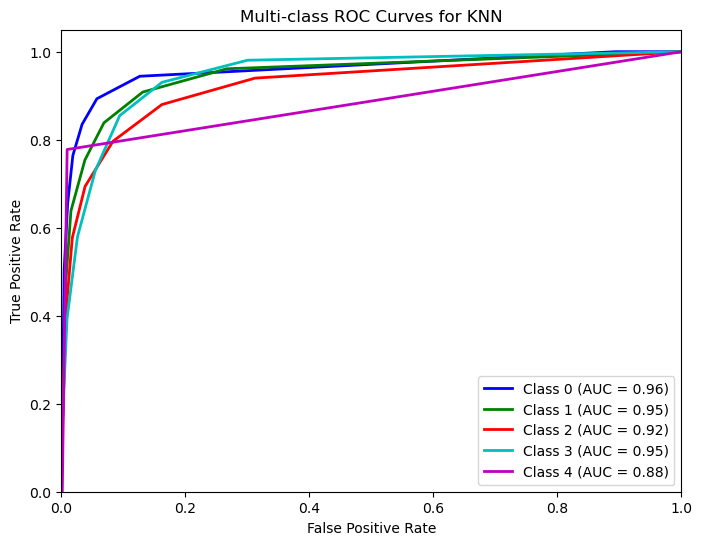

In [162]:
num_classes_knn= len(np.unique(y_test))

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm']  # Add more colors if needed
for i in range(num_classes_knn):
    plt.plot(fpr_knn[i], tpr_knn[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc_knn[i]:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curves for KNN')
plt.legend(loc='lower right')
plt.show()

In [158]:
#nb
y_score_nb = nb.predict_proba(X_test)

# Compute the ROC curves and AUC values for each class
fpr_nb = dict()
tpr_nb = dict()
roc_auc_nb = dict()
for i in range(len(nb.classes_)):
    fpr_nb[i], tpr_nb[i], _ = roc_curve(y_test == i, y_score_nb[:, i])
    roc_auc_nb[i] = auc(fpr_nb[i], tpr_nb[i])

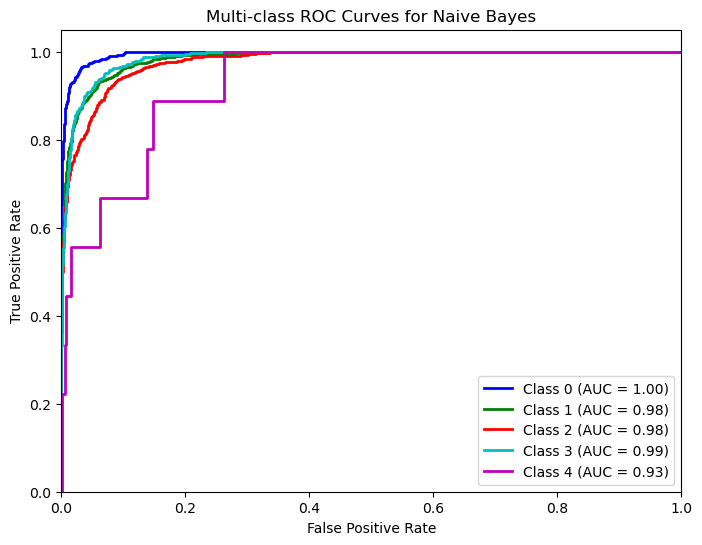

In [166]:
num_classes_nb= len(np.unique(y_test))

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm']  
for i in range(num_classes_nb):
    plt.plot(fpr_nb[i], tpr_nb[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc_nb[i]:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curves for Naive Bayes')
plt.legend(loc='lower right')
plt.show()

In [167]:
#lr
y_score_lr = lr.predict_proba(X_test)


fpr_lr = dict()
tpr_lr = dict()
roc_auc_lr = dict()

# Determine the number of unique classes in your dataset
num_classes_lr = len(np.unique(y_test))

for i in range(num_classes_lr):
    fpr_lr[i], tpr_lr[i], _ = roc_curve(y_test == i, y_score_lr[:, i])
    roc_auc_lr[i] = auc(fpr_lr[i], tpr_lr[i])


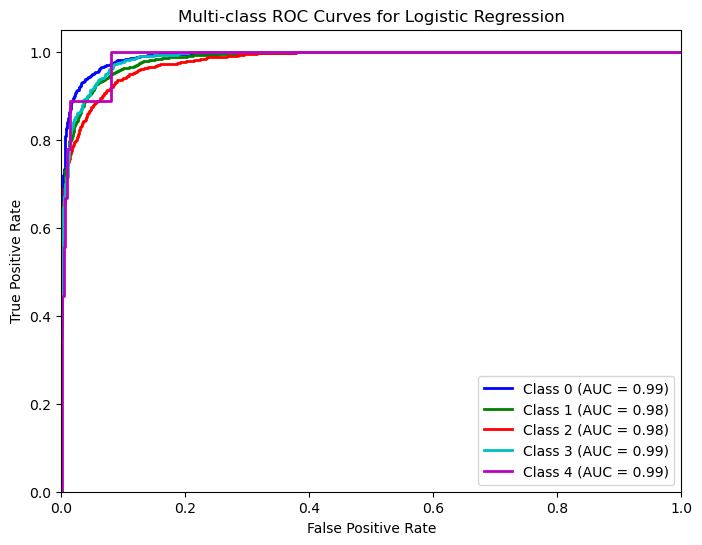

In [168]:
num_classes_lr= len(np.unique(y_test))

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm']  
for i in range(num_classes_lr):
    plt.plot(fpr_lr[i], tpr_lr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc_lr[i]:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curves for Logistic Regression')
plt.legend(loc='lower right')
plt.show()



In [169]:
#rf
y_score_rf = rf.predict_proba(X_test)

fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()

num_classes_rf = len(np.unique(y_test))

for i in range(num_classes_rf):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test == i, y_score_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

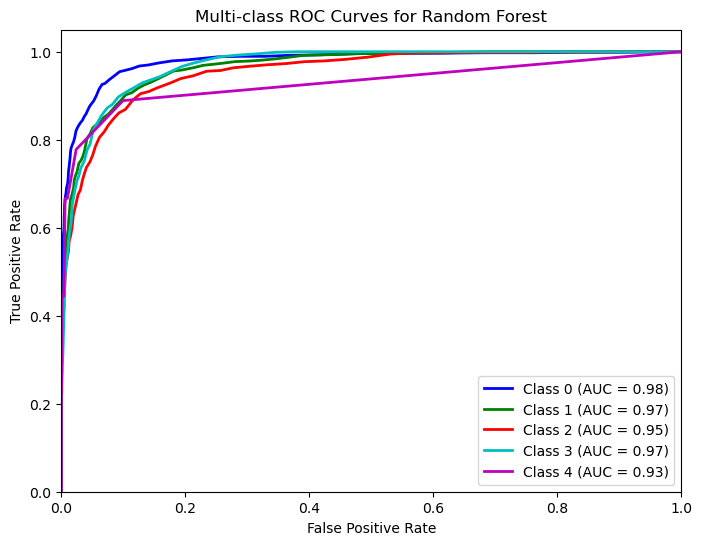

In [170]:
num_classes_rf= len(np.unique(y_test))
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm']  
for i in range(num_classes_rf):
    plt.plot(fpr_rf[i], tpr_rf[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc_rf[i]:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curves for Random Forest')
plt.legend(loc='lower right')
plt.show()

In [171]:
#dt
y_score_dt = dt.predict_proba(X_test)

fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()

num_classes_dt = len(np.unique(y_test))

for i in range(num_classes_dt):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test == i, y_score_dt[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

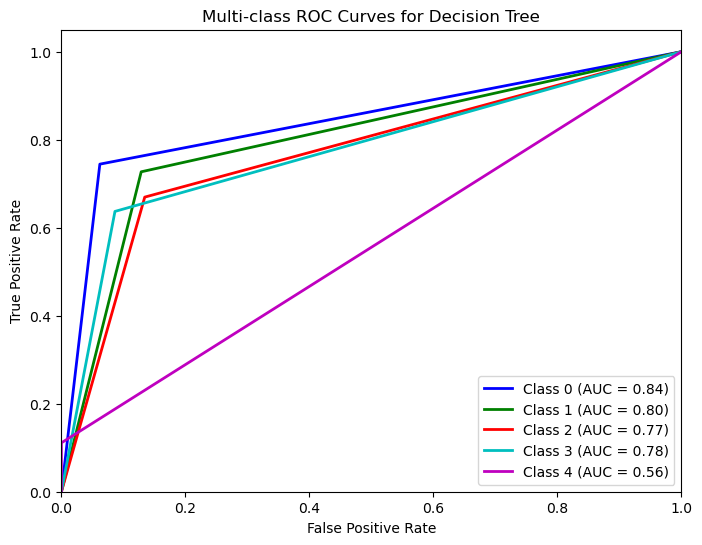

In [173]:
num_classes_dt= len(np.unique(y_test))
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm']  
for i in range(num_classes_dt):
    plt.plot(fpr_dt[i], tpr_dt[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc_dt[i]:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curves for Decision Tree')
plt.legend(loc='lower right')
plt.show()